In [11]:
import pandas as pd

df = pd.read_csv('BTC-USD_stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [13]:
# Convert the `date` column to datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Create four new columns.
df['week'] = df['Date'].dt.strftime('%Y-W%V')
df['month'] = df['Date'].dt.strftime('%Y-%m')
df['quarter'] = df['Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['Date'].dt.strftime('%Y')

In [15]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,week,month,quarter,year
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-W52,2017-01,2017-Q1,2017
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-W01,2017-01,2017-Q1,2017
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-W01,2017-01,2017-Q1,2017
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-W01,2017-01,2017-Q1,2017
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,2017-W01,2017-01,2017-Q1,2017
5,2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000,2017-W01,2017-01,2017-Q1,2017
6,2017-01-07,903.487000,908.585022,823.556030,908.585022,908.585022,279550016,2017-W01,2017-01,2017-Q1,2017
7,2017-01-08,908.174988,942.723999,887.249023,911.198975,911.198975,158715008,2017-W01,2017-01,2017-Q1,2017
8,2017-01-09,913.244019,913.685974,879.807007,902.828003,902.828003,141876992,2017-W02,2017-01,2017-Q1,2017
9,2017-01-10,902.440002,914.872986,901.059998,907.679016,907.679016,115808000,2017-W02,2017-01,2017-Q1,2017


In [ ]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week = df[df['year'] == '2018'].groupby(['week']).mean(numeric_only=True).reset_index()
df_by_week.head()

,week,Open,High,Low,Close,Adj Close,Volume
0,2018-W01,14039.942535,14716.905243,13433.245880,14327.037506,14327.037506,1.605953e+10
1,2018-W02,14704.814314,15061.242885,13686.828683,14322.485631,14322.485631,1.514603e+10
2,2018-W03,12315.499860,12866.514230,11185.412946,12011.500000,12011.500000,1.399041e+10
3,2018-W04,11258.414342,11706.142997,10714.557199,11259.571708,11259.571708,9.241714e+09
4,2018-W05,10082.557199,10251.585658,9126.348703,9582.429967,9582.429967,8.687146e+09


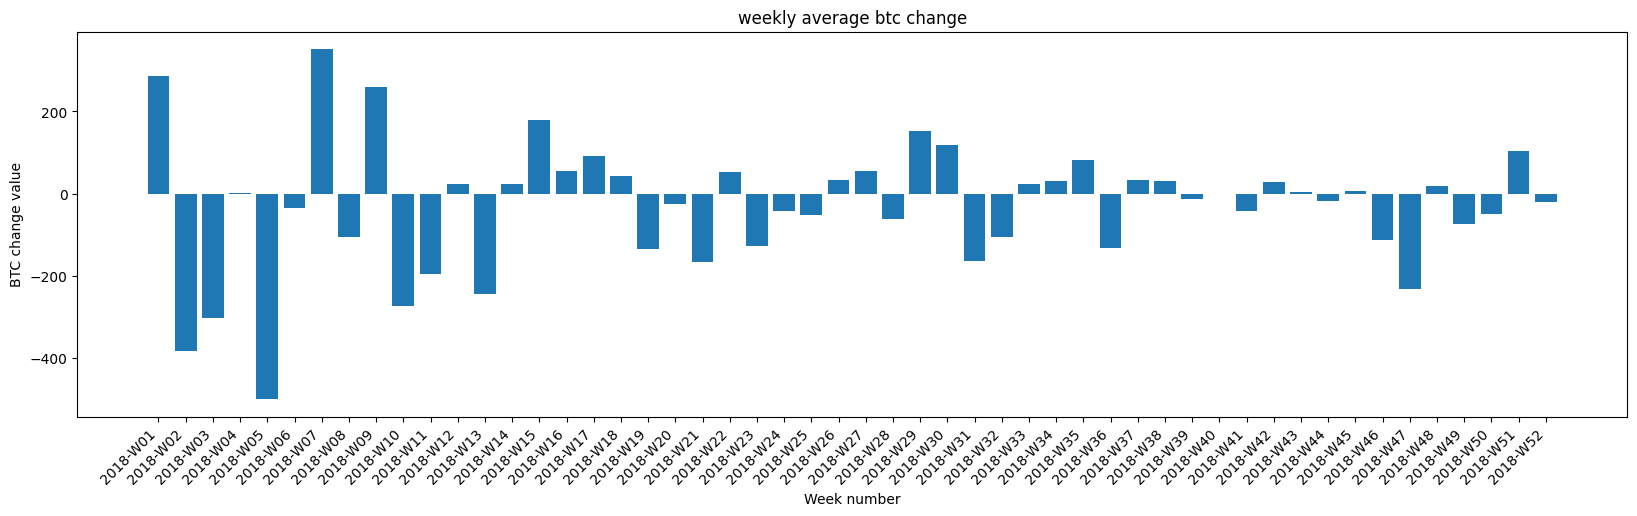

In [ ]:
import matplotlib.pyplot as plt
# Plot a bar graph of weekly strike totals in 2018.
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week['week'], height = df_by_week['Close']-df_by_week['Open'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("BTC change value")
plt.title("weekly average btc change")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()
